<h1 align='center'> COMP2420/COMP6420 - Introduction to Data Management,<br/> Analysis and Security</h1>

<h1 align='center'> Assignment - 2</h1>

-----

|**Maximum Marks**         |**100**
|--------------------------|--------
|  **Weight**              |  **15% of the Total Course Grade**
|  **Submission deadline** |  **8:00PM, Sunday, May 23th**
|  **Submission mode**     |  **Electronic, Using GitLab**
|  **Penalty**             |  **100% after the deadline**


## Learning Outcomes
The following learning outcomes apply to this piece:
- **LO1** - Demonstrate a conceptual understanding of database systems and architecture, data models and declarative query languages
- **LO2** - Define, query and manipulate a relational database
- **LO3** - Demonstrate basic knowledge and understanding of descriptive and predictive data analysis methods, optimization and search, and knowledge representation.
- **LO4** - Formulate and extract descriptive and predictive statistics from data
- **LO5** - Analyse and interpret results from descriptive and predictive data analysis
- **LO6** - Apply their knowledge to a given problem domain and articulate potential data analysis problems
- **LO7** - Identify potential pitfalls, and social and ethical implications of data science
- **LO8** - Explain key security concepts and the use of cryptographic techniques, digital signatures and PKI in security


## Submission

You need to submit the following items:
- The notebook `Assignment-2.ipynb` 
- A completed `statement-of-originality.md`, found in the root of the forked gitlab repo.

Submissions are performed by pushing to your forked GitLab assignment repository. For a refresher on forking and cloning repositories, please refer to `Lab 1`. Issues with your Git repo (with the exception of a CECS/ANU wide Gitlab failure) will not be considered as grounds for an extension. Any variation of this will result in a `zero mark`.

***** 

### Notes:

* It is strongly advised to read the whole assignment before attempting it and have at least a cursory glance at the dataset in order to gauge the requirements and understand what you need to do as a bigger picture.
* Backup your assignment to your Gitlab repo often. 
* Extra reading and research will be required. Make sure you include all references in your Statement of Originality. If this does not occur, at best marks will be deduced. Otherwise, academic misconduct processes will be followed.
* For answers requiring free form written text, use the designated cells denoted by `YOUR WRITTEN ANSWER HERE` -- double click on the cell to write inside them.
* For all coding questions please write your code after the comment `YOUR CODE HERE`.
* In the process of testing your code, you can insert more cells or use print statements for debugging, but when submitting your file remember to remove these cells and calls respectively. You are welcome to add additional cells to the final submission, provided they add value to the overall piece.
* Your code answers will be marked on **correctness** and **readability** of your code, if your marker can't understand your code your marks may be deducted. 
* Your written answers will be marked on the **correctness**, **depth** and **clarity** of your written answers. If your marker cannot understand your answer, marks may be deducted
* Before submitting, restart the kernel in Jupiter Lab and re-run all cells before submitting your code. This will ensure the namespace has not kept any old variables, as these won't come across in submission and your code will not run. Without this, you could lose a significant number of marks.

*****

## Enter Your Student ID Below:

## Introduction

You have three (3) datasets to work with in this assignment, broken down as follows:

- Questions 1 and 2 - Transcoding Dataset
- Question 3 - SDSS
- Question 4 - SuperStore Database

Once again, the  dataset is a sizable dataset (roughly 8000 rows and 24 columns), so it is wise to consider your code in terms of complexity to ensure it doesn't take 30 minutes to run a single line.

Further reading on the datasets can be found in the following locations:
- [Transcoding Dataset.md](./data/cve/about.md)
- [Northwind Database.md](./data/bikestores/about.md)
- [SDSS Description](./data/SDSS_Description.txt)

****

In [1]:
# Code Imports
# Every Lab import is here, you may need to uncomment additional items as necessary.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
from sqlite3 import Error
from scipy import stats
from sklearn.linear_model import LogisticRegression     # Logistic Regression
from sklearn.neighbors import KNeighborsClassifier      # k-Nearest Neighbours
from sklearn.preprocessing import LabelEncoder          # encooding variables
from sklearn.preprocessing import StandardScaler        # encooding variables
from sklearn.model_selection import train_test_split    # testing our models
from sklearn.preprocessing import OneHotEncoder         # nominal variable
from sklearn.metrics import confusion_matrix            # scoring
from sklearn.tree import DecisionTreeClassifier         # decision trees
from sklearn.tree import DecisionTreeRegressor          # decision trees
from sklearn import tree                                # decision trees
from sklearn.decomposition import PCA                   # PCA 
from sklearn.cluster import KMeans                      # KMeans Clustering
from sklearn.linear_model import LinearRegression

In [2]:
# Import additional modules here as required
# It is unlikely that you would need any additional modules, however we had added space here just in case you feel 
#     extras are required. Note that some justification as to WHY you are using them should be provided.
#
# Note that only modules in the standard Anaconda distribution are allowed. If you need to install it manually, it is not an accepted package.

# JUST TO MAKE SURE SOME WARNINGS ARE IGNORED 
import warnings
warnings.filterwarnings("ignore")

# visualization using seaborn
import seaborn as sns

# Silhouette Method For Optimal k
from sklearn.metrics import silhouette_score

# transcoding score normalizing
from sklearn.preprocessing import MinMaxScaler

# find the optimal value of K in KNN
from sklearn import metrics

# build a text report showing the main classification metrics
from sklearn.metrics import classification_report

# optimize hyper parameters of a DecisionTree model using Grid Search
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

****
## Q1: Clustering Videos for Transcoding <span style= 'float: right;'><b>[25 marks]</b></span>
Building off the dataset you initially encountered in Assignment 1, the Transcoding dataset has made a return for the following question.

The following question is designed to get you to load and process data and implement a clustering model for the given scenario below. You have been introduced to `KMeans` clustering in the lectures and labs, and this would therefore be the assumed clustering method, although you are welcome to supplement this with other clustering methods from the `sklearn` package as you desire.

You will first be asked to import and pre-process the data ready to implement a clustering model. Then, you are on your own in the world of clustering. Good luck!

### 1.1 Preprocessing <span style= 'float: right;'><b>[5 marks]</b></span>

To start, bring in the data and get it ready for clustering. Your tasks are:

1. Import the Data. The dataset is available in the location `data/transcoding_data.csv`.
2. Check the dataset for any missing values and account for them.
3. Prepare the data for a clustering task. You are welcome to use the data processing code that you wrote for the previous assignment.
    - Drop irrelevant and redundant columns. Also drop the columns `frames`, `category`, `size`, `o_bitrate`, `codec`, and `o_codec`.
    - Encode `o_resolution` as ordinal categorical variable with the order (176 x 144) $\prec$ (320 x 240) $\prec$ (480 x 360) $\prec$ (640 x 480) $\prec$ (1280 x 720) $\prec$ (1920 x 1080).
4. Provide descriptive statistics and display the first ten rows of the resulting dataset.

Descriptive statistics generally consists of count, mean, standard deviation, min, max, and interquartile measures.
The relation $a \prec b$ states that the variable $a$ precedes $b$.

In [3]:
# YOUR CODE HERE
# (ANY ADDITIONAL CELLS AS REQUIRED)

# 1. import data
transcoding_data = pd.read_csv('./data/transcoding_data.csv')

In [4]:
# 2. check for any missing values 
# the result below shows there are no missing values in the dataset
transcoding_data.isnull().any()

id              False
duration        False
codec           False
bitrate         False
width           False
height          False
resolution      False
framerate       False
frames          False
i               False
p               False
b               False
size            False
category        False
url             False
o_codec         False
o_bitrate       False
o_framerate     False
o_width         False
o_height        False
o_resolution    False
umem            False
utime           False
dtype: bool

In [5]:
# 3. prepare for clustering
# drop columns
transcoding_data.drop([
    # irrelevant columns
    'id', 'url', 
    # redundant columns
    'width', 'height', 'o_width', 'o_height',
    # designated columns
    'frames', 'category', 'size', 'o_bitrate', 'codec', 'o_codec'
], axis = 1, inplace=True)

# archive data
transcoding_data_copy = transcoding_data.copy()

def convert_o_resolution(object):
    if object == '176x144':
        return '1'
    if object == '320x240':
        return '2'
    if object == '480x360':
        return '3'
    if object == '640x480':
        return '4'
    if object == '1280x720':
        return '5'
    if object == '1920x1080':
        return '6'

# encode o_resolution as ordinal categorical variable    
transcoding_data['o_resolution'] = transcoding_data['o_resolution'].apply(convert_o_resolution)

In [6]:
# 4. descriptive statistics
transcoding_data.describe().round(0).applymap(np.int64)

,duration,bitrate,framerate,i,p,b,o_framerate,umem,utime
count,4890,4890,4890,4890,4890,4890,4890,4890,4890
mean,1277,788,23,399,28510,116,21,197016,162
std,1554,1166,8,497,36594,158,7,195384,72
min,1,9,0,0,12,0,12,3970,1
25%,405,91,12,116,7731,29,15,63693,107
50%,812,347,25,247,17230,65,24,130939,155
75%,1545,837,30,495,35080,143,25,260130,206
max,25845,14502,49,7032,530243,2329,30,1315594,614


In [7]:
# 4. the first ten rows
transcoding_data.head(10)

,duration,bitrate,resolution,framerate,i,p,b,o_framerate,o_resolution,umem,utime
0,267,373,568x320,29.97,102,7858,40,15.00,3,172247.935215,166.415727
1,267,324,400x226,29.97,130,7816,54,12.00,2,115355.838797,51.035704
2,267,85,176x144,12.00,43,3146,14,24.00,4,37827.340566,173.629478
3,31,1261,640x480,24.00,58,714,28,24.00,4,110002.908561,150.693204
4,31,370,320x240,24.00,61,674,8,29.97,6,77903.861755,278.413210
5,333,727,384x288,25.00,139,8157,27,15.00,3,90781.115843,130.548432
6,333,306,320x240,25.00,163,8119,42,24.00,5,54266.504159,184.049056
7,333,91,176x144,12.00,57,3920,18,15.00,3,18842.877160,59.506751
8,67,633,854x480,29.92,26,1974,4,29.97,6,236610.816723,235.736431
9,67,302,400x224,29.92,52,1922,29,24.00,6,104387.945170,220.047137


### 1.2 K-Means Clustering Implementation <span style= 'float: right;'><b>[10 marks]</b></span>

Clustering helps visualise a dataset based on attributes considered important to the data scientist and/or reader.  Using the **Transcoding Dataset** above, implement a `K-Means clustering algorithm` to cluster the dataset of transcoded videos by using either all or a subset of the available features. Suppose you have used more than two features for your clustering; you are expected to reduce the dataset to either 2 or 3 dimensions.  After you have prepared your learning model, plot a **2D or 3D visualisation** showing the different clusters. 

It is up to you to decide how many clusters you would like to incorporate in your model. You are expected to **verbally and visually** justify your implementation, including the reasoning behind the choice of **the number of clusters** and **number of iterations** in your model. 

<span style='color:red;'><b>Note:</b> You are only allowed to use packages that are within the Anaconda distribution.</span>

In [8]:
# YOUR CODE HERE
# (ANY ADDITIONAL CELLS AS REQUIRED)

# encode
le = LabelEncoder()
transcoding_data['resolution'] = le.fit_transform(transcoding_data['resolution'])

# scale 
ss = StandardScaler()
ss.fit(transcoding_data)
transcoding_data_scaled = ss.transform(transcoding_data)

# decompose
pca = PCA(n_components=2)
transcoding_data_reduced = pca.fit_transform(transcoding_data_scaled)

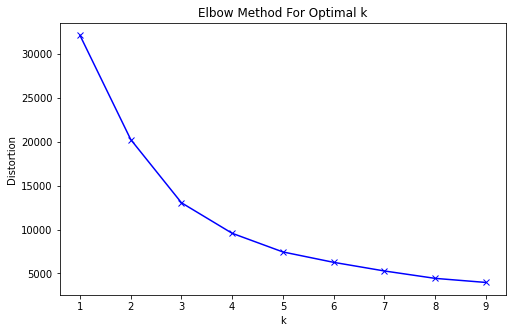

In [9]:
# Elbow Method For Optimal k

distortions = []
K = range(1,10)

for k in K:
    kmc = KMeans(n_clusters=k)
    kmc.fit(transcoding_data_reduced)
    distortions.append(kmc.inertia_)
    
plt.figure(figsize=(8,5))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Elbow Method For Optimal k')
plt.show()

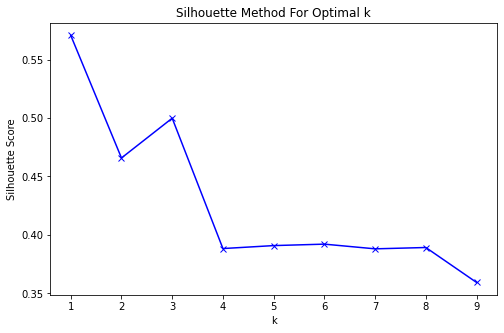

In [10]:
# Silhouette Method For Optimal k

sil = []
kmax = 10

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):
  kmc = KMeans(n_clusters = k).fit(transcoding_data_reduced)
  labels = kmc.labels_
  sil.append(silhouette_score(transcoding_data_reduced, labels, metric = 'euclidean'))

plt.figure(figsize=(8,5))
plt.plot(K, sil, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method For Optimal k')
plt.show()

In [11]:
print("Total rows in the transcoding dataset is:", len(transcoding_data_reduced))

Total rows in the transcoding dataset is: 4890


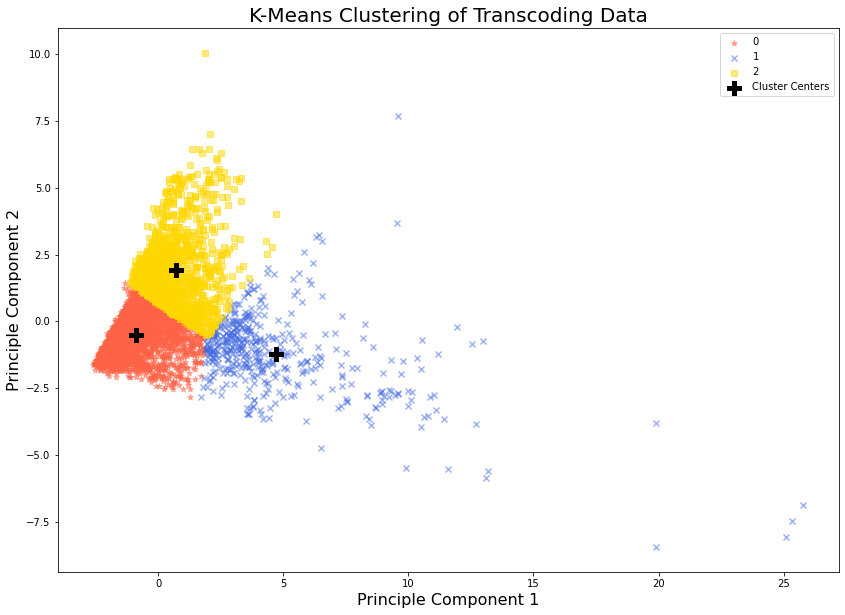

In [12]:
# 3 clusters
# random seed set so that analysis is consistent below
kmc = KMeans(n_clusters=3, random_state=0, max_iter=1630)
kmc_model = kmc.fit(transcoding_data_reduced)

# plotting 
markers = ['*', 'x', 's', 'D', 'P', 'X']
colors=["tomato","royalblue","gold","rebeccapurple","limegreen","rosybrown"]
plt.figure(figsize=(14, 10))
for i in range(np.max(kmc_model.labels_)+1):
    plt.scatter(transcoding_data_reduced[kmc_model.labels_==i][:,0], transcoding_data_reduced[kmc_model.labels_==i][:,1], label=i, c=colors[i], marker=markers[i], alpha=0.5)
plt.scatter(kmc_model.cluster_centers_[:,0], kmc_model.cluster_centers_[:,1], label='Cluster Centers', c='black', marker='P', s=200)
plt.title("K-Means Clustering of Transcoding Data",size=20)
plt.xlabel("Principle Component 1", size=16)
plt.ylabel("Principle Component 2", size=16)
plt.legend()
plt.show()

### 1.3 Analysing the Clusters <span style= 'float: right;'><b>[10 marks]</b></span>

With your clustering model complete, analyse the outputs in preparation for showing the results to the procurement team. Create a DataFrame for each cluster's data and identify their main attributes - how do these clusters differ from each other. Provide a brief commentary of the clustering model based on the analysis along with a visualisation of the mean `umem` and `utime` across the different clusters.

**Note:** Your analysis should include the mean and deviation of the continuous variables, mode of the categorical variables, and size of each cluster.

In [13]:
# YOUR CODE HERE
# (ANY ADDITIONAL CELLS AS REQUIRED)

# convert types
transcoding_data_copy['resolution'].astype(str)
transcoding_data_copy['o_resolution'].astype(str)

# split data and analyse
k = np.max(kmc_model.labels_)+1
df_clusters = [transcoding_data_copy[kmc_model.labels_==i] for i in range(k)]

stat_dict = { 
    # size of each cluster
    'Cluster' : list(range(k)),
    'Size' :    [len(df_clusters[i]) for i in range(k)],
    # mode of the categorical variables
    'Mode Resolution':                  [df_clusters[i]['resolution'].value_counts().idxmax() for i in range(k)],
    'Mode Output_Resolution':           [df_clusters[i]['o_resolution'].value_counts().idxmax() for i in range(k)],
    # mean and deviation of the continuous variables
    'Mean Duration' :                   [round(df_clusters[i]['duration'].mean(), 0).astype(int) for i in range(k)],
    'Mean Bitrate' :                    [round(df_clusters[i]['bitrate'].mean(), 0).astype(int) for i in range(k)],
    'Mean Framerate' :                  [round(df_clusters[i]['framerate'].mean(), 0).astype(int) for i in range(k)],
    'Mean Memory' :                     [round(df_clusters[i]['umem'].mean(), 0).astype(int) for i in range(k)],
    'Mean Time' :                       [round(df_clusters[i]['utime'].mean(), 0).astype(int) for i in range(k)],
    'Std Dev Duration' :                [round(df_clusters[i]['duration'].std(), 0).astype(int) for i in range(k)],
    'Std Dev Bitrate' :                 [round(df_clusters[i]['bitrate'].std(), 0).astype(int) for i in range(k)],
    'Std Dev Framerate' :               [round(df_clusters[i]['framerate'].std(), 0).astype(int) for i in range(k)],
    'Std Dev Memory' :                  [round(df_clusters[i]['umem'].std(), 0).astype(int) for i in range(k)],
    'Std Dev Time' :                    [round(df_clusters[i]['utime'].std(), 0).astype(int) for i in range(k)]
}
df_cluster_stats = pd.DataFrame(stat_dict)
df_cluster_stats

,Cluster,Size,Mode Resolution,Mode Output_Resolution,Mean Duration,Mean Bitrate,Mean Framerate,Mean Memory,Mean Time,Std Dev Duration,Std Dev Bitrate,Std Dev Framerate,Std Dev Memory,Std Dev Time
0,0,3284,176x144,176x144,859,333,21,101662,128,769,314,8,74198,50
1,1,452,320x240,640x480,4780,610,26,303535,229,2645,905,6,168885,79
2,2,1154,1280x720,1920x1080,1096,2154,29,426648,230,688,1640,3,227854,55


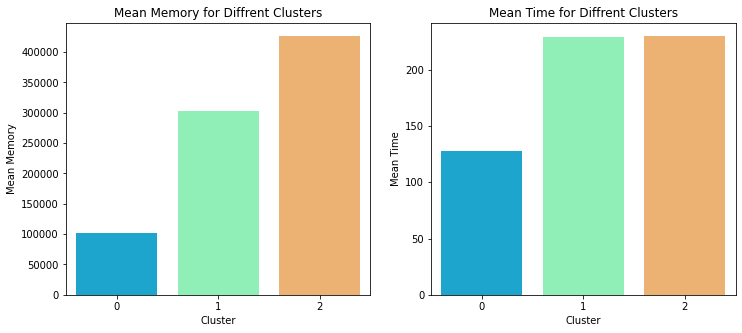

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5), gridspec_kw={"width_ratios": [1, 1]}) 

sns.barplot(data=df_cluster_stats, x='Cluster', y='Mean Memory', palette='rainbow', ax=axes[0])
sns.barplot(data=df_cluster_stats, x='Cluster', y='Mean Time', palette='rainbow', ax=axes[1])

axes[0].set_title('Mean Memory for Diffrent Clusters')
axes[1].set_title('Mean Time for Diffrent Clusters')

plt.show()

*****
## Q2: KNN Classification for Video Transcoding <span style= 'float: right;'><b>[20 marks]</b></span>

The rental company has decided that they want to use simple machine learning to allocate cost tags based on the transcoding score to the transcoded videos. The transcoding score can be obtained by taking the average of `umem` and `utime` and then normalizing it. The tags are as follows:


|  **Classification**      |  **Requirements**        |
|--------------------------|------------------------- |
|  Cheap                   |  Transcoding Score is between 0.0 and 0.3   |
|  Moderate                |  Transcoding Score is between 0.3 and 0.7 |
|  Expensive               |  Transcoding Score is between 0.7 and 1.0 |


**Note:** The `Classification` variable is an ordinal categorical variable whose ordering is Cheap $\prec$ Moderate $\prec$ Expensive where the relation $a \prec b$ states that the variable $a$ precedes $b$.




**Your task is to implement a `K-Nearest Neighbours Classification Algorithm` that can predict the transcoding score of a video**. 

You are required to perform the following tasks:

1. Use the same transcoding_data dataset as the previous question.
2. Modify the dataset to create the `Transcoding Score` column by manually determining the prediction class for existing data (where the rating is within the classification system defined above)
3. Implement an algorithm that can predict the `Transcoding Score` using the features present in the transcoding_data dataset.
4. Perform independent testing of the model and provide statistical metrics outlining the performance of your model. Splitting the dataset into testing and training subsets will assist with this.

You are welcome to use any features within the dataset, except the `umem` and `utime` of the transcoded video. Various attributes relating to the characteristics of the video and their respective transcoding settings in the tables can be helpful while making the algorithm. If required, you can also look to make new compound attributes that may be helpful in increasing the accuracy of your model.

You are expected to **verbally and visually (wherever approriate)** justify all aspects of your answer, including the features used, the metrics provided and the validation system employed. Provide commentary on the strengths and potential pitfalls of the model.

<span style='color:red;'><b>Note:</b> You are only allowed to use packages that are within the Anaconda distribution. This means packages such as Keras, Tensorflow etc are not available for use.</span> 

In [15]:
# YOUR CODE HERE
# (ANY ADDITIONAL CELLS AS REQUIRED)

# inherit the transcoding dataset
knn_data = transcoding_data_copy

# encode the categorical variables
le = LabelEncoder()
knn_data['resolution'] = le.fit_transform(knn_data['resolution'])
knn_data['o_resolution'] = le.fit_transform(knn_data['o_resolution'])

# calculate transcoding score by taking the average of umem and utime
cols = knn_data.loc[: , 'umem' : 'utime']
knn_data['score'] = cols.mean(axis=1)

# normalize transcoding score
mms = MinMaxScaler()
knn_data['score'] = mms.fit_transform(np.array(knn_data['score']).reshape(-1,1))

def convert_score(score):
    if 0.0 <= score <= 0.3:
        return 'Cheap'
    if 0.3 <= score <= 0.7:
        return 'Moderate'
    if 0.7 <= score <= 1.0:
        return 'Expensive'

# compute the transcoding score to classification variable
knn_data['score'] = knn_data['score'].apply(convert_score)

knn_data.head()

,duration,bitrate,resolution,framerate,i,p,b,o_framerate,o_resolution,umem,utime,score
0,267,373,161,29.97,102,7858,40,15.00,4,172247.935215,166.415727,Cheap
1,267,324,106,29.97,130,7816,54,12.00,3,115355.838797,51.035704,Cheap
2,267,85,30,12.00,43,3146,14,24.00,5,37827.340566,173.629478,Cheap
3,31,1261,194,24.00,58,714,28,24.00,5,110002.908561,150.693204,Cheap
4,31,370,67,24.00,61,674,8,29.97,2,77903.861755,278.413210,Cheap


In [16]:
# show the correlation scores between transcoding score and other variables
knn_corr = knn_data.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1).round(3)
knn_corr['score']

duration        0.116
bitrate         0.438
resolution      0.047
framerate      -0.046
i               0.143
p               0.124
b               0.019
o_framerate     0.039
o_resolution   -0.001
umem            0.117
utime           0.117
score           1.000
Name: score, dtype: float64

In [17]:
# split data
train, test = train_test_split(knn_data, test_size=0.2, random_state=5)

# scale data
ss = StandardScaler()
train.iloc[:,:-1] = ss.fit_transform(train.iloc[:,:-1])
test.iloc[:,:-1] = ss.fit_transform(test.iloc[:,:-1])

# set x, y for training and testing
x_train, y_train, x_test, y_test = pd.DataFrame(train['bitrate']), pd.DataFrame(train['score']), pd.DataFrame(test['bitrate']), pd.DataFrame(test['score'])

Maximum accuracy is 0.931 at K = 19


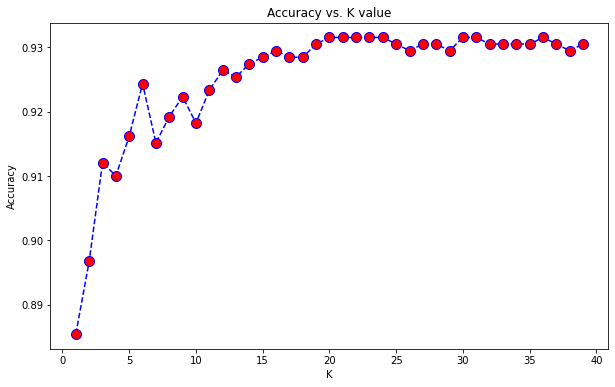

In [18]:
# find the optimal value of K in KNN

acc = []

for i in range(1,40):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(x_train,y_train)
    yhat = neigh.predict(x_test)
    acc.append(metrics.accuracy_score(y_test, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Accuracy vs. K value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy is",max(acc).round(3),"at K =",acc.index(max(acc)))

In [111]:
# build KNN model and fit data
knn = KNeighborsClassifier(n_neighbors=19)
knn_model = knn.fit(x_train, y_train)

# find the training and testing scores of the model 
print("Training Score:", knn_model.score(x_train, y_train))
print("Testing Score: ", knn_model.score(x_test, y_test))
print("Overfitting:   ", knn_model.score(x_train, y_train)>knn_model.score(x_test, y_test))

Training Score: 0.80975
Testing Score:  0.8155
Overfitting:    False


In [20]:
# make prediction of y_pred for x_test
y_pred = knn_model.predict(x_test)

# print normalized confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm = (cm/cm.astype(np.float).sum(axis=1)).round(2)
print("   C    M    E")
print("C", cm[0][0], cm[0][1], "", cm[0][2])
print("M", cm[1][0], "", cm[1][1], "", cm[1][2])
print("E", cm[2][0], cm[2][1], "", cm[2][2])

   C    M    E
C 0.97 0.0  0.21
M 0.0  0.0  0.09
E 0.04 0.0  0.71


In [21]:
# generate a text report showing the main classification metrics
target_names = ['Cheap', 'Moderate', 'Expensive']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

       Cheap       0.96      0.97      0.97       851
    Moderate       0.00      0.00      0.00        10
   Expensive       0.71      0.71      0.71       117

    accuracy                           0.93       978
   macro avg       0.56      0.56      0.56       978
weighted avg       0.92      0.93      0.93       978



*****
## Q3: Decision Trees for Digital Sky <span style= 'float: right;'><b>[20 marks]</b></span>

The SDSS.csv data consists of 10,000 observations of space taken by the Sloan Digital Sky Survey, which offers public data of space observations. Every observation is described by 17 feature columns and 1 class column, which identifies it as either a star, galaxy or quasar.

To ease your start with the data, you can read the feature descriptions in the [SDSS Description](./data/SDSS_Description.txt) file.

**Your task is to implement a `Decision Tree Classification Algorithm` that can predict the `class` of an image**.

You are required to perform the following tasks:

1. Import the SDSS dataset and perform preprocessing as required.
2. Create a new feature (or column) called `category` by converting the nominal categorical variable `class` into an ordinal categorical variable based on the table presented below:

|  **class**      |  **category**        |
|--------------------------|------------------------- |
|  STAR                   |  0   |
|  GALAXY                |  1 |
|  QSO               |  2 |


3. Implement an algorithm that can predict the `category` using the features present in the SDSS dataset.
4. Perform independent testing of the model and provide statistical metrics outlining the performance of your model. Splitting the dataset into testing and training subsets will assist with this.
5.  Plot the resulting Decision Tree produced by the Tree-Building algorithm.

The QSO class refers to the quasi-stellar object, quasar. The order assigned to the `class` categorical variable is based on the brightness of the object, i.e. QSO is brighter than a GALAXY, and a GALAXY is brighter than a STAR.

You are welcome to use any features within the dataset, except the `class` of the SDSS data. If required, you can also look to make new compound attributes that may help increase the accuracy of your model. You are expected to **verbally and visually** justify all aspects of your answer, including the features used, the metrics provided and the validation system employed. Provide commentary on the strengths and potential pitfalls of the model.

<span style='color:red;'><b>Note:</b> You are only allowed to use packages that are within the Anaconda distribution. This means packages such as Keras, Tensorflow etc are not available for use.</span> 

In [113]:
# YOUR CODE HERE
# (ANY ADDITIONAL CELLS AS REQUIRED)

# import data
sdss_data = pd.read_csv("data/sdss.csv")

# drop NA if any
sdss_data = sdss_data.dropna()

def convert_class(object):
    if object == 'STAR':
        return '0'
    if object == 'GALAXY':
        return '1'
    if object == 'QSO':
        return '2'

# encode class as ordinal categorical variable into category
sdss_data['category'] = sdss_data['class'].apply(convert_class)

# drop class column, rerun column(all values are same), and unnecessary columns (all kinds of id, serial number, date)
sdss_data.drop(['class', 'rerun', 'camcol', 'objid', 'specobjid', 'mjd', 'fiberid'], axis = 1, inplace=True)

sdss_data.head()

,ra,dec,u,g,r,i,z,run,field,redshift,plate,category
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,267,-0.000009,3306,0
1,183.598370,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,267,-0.000055,323,0
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,268,0.123111,287,1
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,269,-0.000111,3306,0
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,269,0.000590,3306,0


In [117]:
# YOUR CODE HERE
# (ANY ADDITIONAL CELLS AS REQUIRED)

# split data
train, test = train_test_split(sdss_data, test_size=0.2, random_state=50)

# set x, y for training and testing
x_train, y_train, x_test, y_test = train.iloc[:,:-1], train.iloc[:,-1], test.iloc[:,:-1], test.iloc[:,-1]

clf = DecisionTreeClassifier(random_state=42)
pipe = Pipeline(steps=[('dec_tree', clf)])
parameters = dict(
    dec_tree__max_depth=np.arange(1,10,2),
    dec_tree__min_samples_split=np.arange(10,60,20),
    dec_tree__min_samples_leaf=np.arange(1,10,2)
)
clf_GS = GridSearchCV(pipe, parameters, n_jobs=-1, cv=2)
clf_GS.fit(x_train, y_train)

max_depth = clf_GS.best_estimator_.get_params()['dec_tree__max_depth']
min_samples_split = clf_GS.best_estimator_.get_params()['dec_tree__min_samples_split']
min_samples_leaf = clf_GS.best_estimator_.get_params()['dec_tree__min_samples_leaf']

print('Best max_depth:', max_depth)
print('Best min_samples_split:', min_samples_split)
print('Best min_samples_leaf:', min_samples_leaf)

Best max_depth: 3
Best min_samples_split: 10
Best min_samples_leaf: 7


In [118]:
clf = DecisionTreeClassifier(max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf, random_state=42)
clf = clf.fit(x_train, y_train)

In [119]:
print("Training Score:", clf.score(x_train, y_train))
print("Testing Score: ", clf.score(x_test, y_test))
print("Overfitting:   ", clf.score(x_train, y_train)>clf.score(x_test, y_test))

Training Score: 0.9895
Testing Score:  0.986
Overfitting:    True


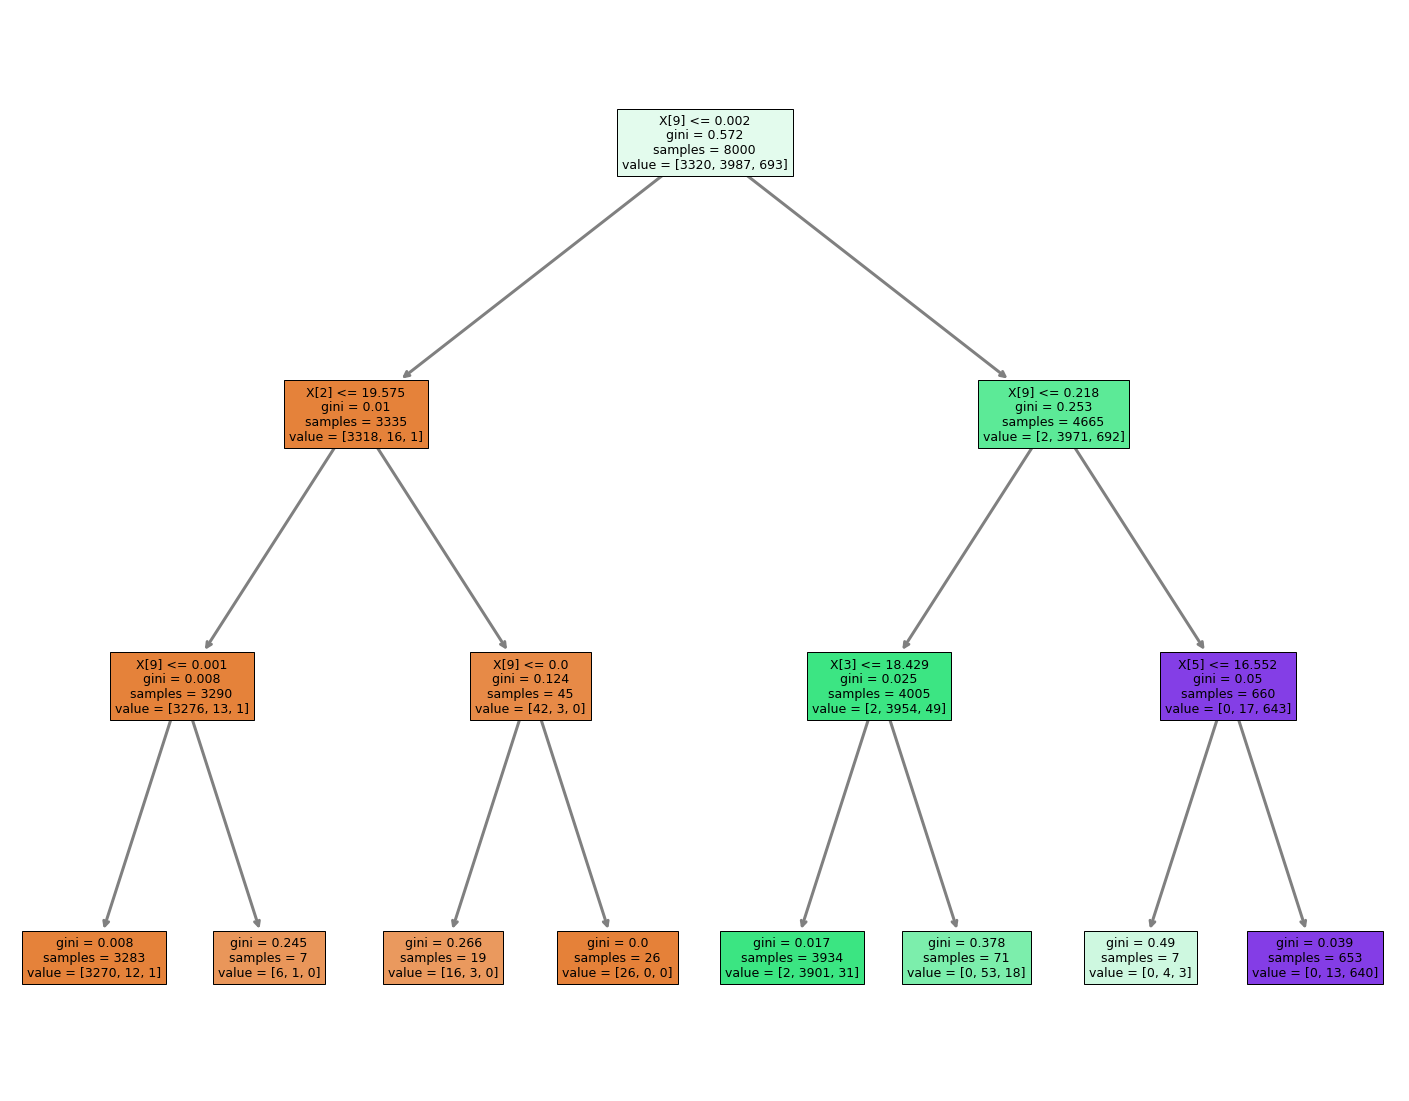

In [120]:
fig = plt.figure(figsize=(25,20))

tree_plot = tree.plot_tree(clf, filled =True)

for o in tree_plot:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('grey')
        arrow.set_linewidth(3)

*****
## Q4: Serious SQL <span style= 'float: right;'><b>[20 marks]</b></span>
Consider the following scenario.

> You are applying for a job as a database developer for an unnamed wrestling company. Part of the job description includes creating an automation system for running SQL queries. During the hiring process, the interviewers want to ensure you understand the SQL language. They have provided a set of questions to be answered by you, and your responses will later be reviewed by them. They are unwilling to give you access to their real database (which is mysteriously missing), so they have provided an SQLite3 database and asked you to interact with it using Python. 


Based on the above scenario, you have been asked to answer a number of questions to test your skills. You will be using the Northwind database for this question. The database model is as follows:

![Northwind_Database](./img/er_diagram.png)

In the following questions, you will be asked to execute the SQL statement, and explain any reasoning as necessary. Data can be formatted as raw printed output or a Pandas DataFrame. Recall the use of the `fetchone` and `fetchall` functions on an sqlite cursor for retriving information.

In [25]:
# THIS IS YOUR CONNECTION BLOCK, DO NOT MODIFY THIS. 
# OTHERWISE, YOU WILL NOT BE ABLE TO READ THE DATABASE
def create_connection():
    """ create a database connection to a database that resides
        in the memory
    """
    conn = None
    try:
        conn = sqlite3.connect(':memory:')
        print("Connection established!")
        
    except Error as e:
        print("Error Connecting to Database")
        raise(e)
    return conn

northwind_sql = 'data/northwind.sql'
conn = create_connection() 
cur = conn.cursor()
qry = open(northwind_sql, 'r').read()
cur.executescript(qry)
conn.commit()
# remember to close the connection when everything is done

Connection established!


In [26]:
def execute_sql(query):
    # Select table and display
    cur.execute(query)

    # Fetches all the rows from the result of the query
    rows = cur.fetchall()
    
    # Gets the column names for the table
    colnames = [desc[0] for desc in cur.description]

    # Converts into readable pandas dataframe
    df_result = pd.DataFrame(rows, columns=colnames)
    return df_result

### 4.1: Customised Customers <span style= 'float: right;'><b>[3 marks]</b></span>

Retrieve the details of all the customers whose `ContactTitle` is Owner or is located in the `Country` Mexico. 

In [28]:
# YOUR CODE HERE
# (ANY ADDITIONAL CELLS AS REQUIRED)

execute_sql(
    """
    
    SELECT * FROM Employees;
    
    """
)

,EmployeeID,LastName,FirstName,Title,TitleOfCourtesy,BirthDate,HireDate,Address,City,Region,PostalCode,Country,HomePhone,Extension,Photo,Notes,ReportsTo
0,1,Davolio,Nancy,Sales Representative,Ms.,12/08/1948,05/01/1992,507 - 20th Ave. E.\nApt. 2A,Seattle,WA,98122,USA,(206) 555-9857,5467,None,Education includes a BA in psychology from Col...,2.0
1,2,Fuller,Andrew,"Vice President, Sales",Dr.,02/19/1952,08/14/1992,908 W. Capital Way,Tacoma,WA,98401,USA,(206) 555-9482,3457,None,Andrew received his BTS commercial in 1974 and...,NaN
2,3,Leverling,Janet,Sales Representative,Ms.,08/30/1963,04/01/1992,722 Moss Bay Blvd.,Kirkland,WA,98033,USA,(206) 555-3412,3355,None,Janet has a BS degree in chemistry from Boston...,2.0
3,4,Peacock,Margaret,Sales Representative,Mrs.,09/19/1937,05/03/1993,4110 Old Redmond Rd.,Redmond,WA,98052,USA,(206) 555-8122,5176,None,Margaret holds a BA in English literature from...,2.0
4,5,Buchanan,Steven,Sales Manager,Mr.,03/04/1955,10/17/1993,14 Garrett Hill,London,None,SW1 8JR,UK,(71) 555-4848,3453,None,Steven Buchanan graduated from St. Andrews Uni...,2.0
5,6,Suyama,Michael,Sales Representative,Mr.,07/02/1963,10/17/1993,Coventry House\nMiner Rd.,London,None,EC2 7JR,UK,(71) 555-7773,428,None,Michael is a graduate of Sussex University (MA...,5.0
6,7,King,Robert,Sales Representative,Mr.,05/29/1960,01/02/1994,Edgeham Hollow\nWinchester Way,London,None,RG1 9SP,UK,(71) 555-5598,465,None,Robert King served in the Peace Corps and trav...,5.0
7,8,Callahan,Laura,Inside Sales Coordinator,Ms.,01/09/1958,03/05/1994,4726 - 11th Ave. N.E.,Seattle,WA,98105,USA,(206) 555-1189,2344,None,Laura received a BA in psychology from the Uni...,2.0
8,9,Dodsworth,Anne,Sales Representative,Ms.,01/27/1966,11/15/1994,7 Houndstooth Rd.,London,None,WG2 7LT,UK,(71) 555-4444,452,None,Anne has a BA degree in English from St. Lawre...,5.0


### 4.2: Customers With No Orders <span style= 'float: right;'><b>[3 marks]</b></span>
There are some customers who have never actually placed an order. Show these customers.

In [ ]:
# YOUR CODE HERE
# (ANY ADDITIONAL CELLS AS REQUIRED)

### 4.3: Products & their Categories <span style= 'float: right;'><b>[3 marks]</b></span>

Count the total quantity sold for each products. Retrieve the `ProductID`, `ProductName`, `CategoryName`, and the total quantity sold as `Total Sold`.

In [ ]:
# YOUR CODE HERE
# (ANY ADDITIONAL CELLS AS REQUIRED)

### 4.4: Products Above Average Price <span style= 'float: right;'><b>[3 marks]</b></span>

Retrieve the `ProductName` and `UnitPrice` of all the products whose price is greater than the average price of all the products.

In [ ]:
# YOUR CODE HERE
# (ANY ADDITIONAL CELLS AS REQUIRED)

### 4.5: Most Expensive Products <span style= 'float: right;'><b>[3 marks]</b></span>

Get the `ProductName` and the `UnitPrice` of the top 10 most expensive products.

In [ ]:
# YOUR CODE HERE
# (ANY ADDITIONAL CELLS AS REQUIRED)

### 4.6: Stocktaking Products by Category and Supplier <span style= 'float: right;'><b>[5 marks]</b></span>

Get the total number of units that are in stock for each `ProductCategory` for each `Supplier Continent`. The resulting table should contain three columns: `ProductCategory`, `Supplier Continent`, and `UnitsInStock`.

`Supplier Continent` can be obtained by mapping the values present in `Country` to their relevant continent. The table below contains the list of countries and the continent that they belong to.

|  **Country**      |  **Supplier Continent**        |
|--------------------------|------------------------- |
|  UK, Spain, Sweden, Germany, Norway, Denmark, Netherlands, Finland, Italy, France                   |  Europe   |
|  USA, Canada, Brazil                |  America |
|  Australia, Japan, Singapore               |  Asia-Pacific |

In [ ]:
# YOUR CODE HERE
# (ANY ADDITIONAL CELLS AS REQUIRED)

*****
## Q5: Ethics and Security <span style= 'float: right;'><b>[15 marks]</b></span>




#### 5.1: OkCupid Data Scrape <span style= 'float: right;'><b>[5 marks]</b></span>

While Data Scientists and Data Engineers spend a lot of timing thinking about how to solve a problem, it is important to think about _why_ we solve a problem and what impacts it could have. For the following scenario, provide a written response to the questions.

> In 2016, almost 70,000 Okcupid profiles had their data released onto the Open Science Framework. This place is an online community where people share raw data and collaborate with each other over data sets. Two Danish researchers, Emil Kirkegaard and Julius Daugbjerg-Bjerrekaer, scraped the data with a bot profile on Okcupid and released publicly identifiable information such as age, gender, sexual orientation, and personal responses to the survey questions the website asks when people sign up for a profile. More importantly, the two researchers didn’t feel their actions were explicitly or ethically wrong, because “Data is already public.” This huge data release raised eyebrows and forced questions about the ethics of releasing “already public” data. 

What does big data ethics have to say about already public data? What harms could arise from the outcomes of the two Danish researchers' actions?

Provide examples in your response to the questions.

**NOTE:** Marks will be awarded based on the brevity and clarity of the arguments and not on quantity. Do not exceed more than 300 words.

#### 5.2: Digital Signature <span style= 'float: right;'><b>[8 marks]</b></span>

Consider the following scenario:

> Ray Technologies has outsourced some work to Lux and Kay, and needs them to jointly sign a contract, which it will then also sign. Since all of the parties involved are located in different parts of the world, and this is a frequently occurring scenario, Ray Technologies decides to come up with a method for doing this electronically. The contract has to be signed by both Lux and Kay, and then finally by Ray Technologies. We assume that the contract is transmitted electronically over public channels, so integrity and confidentiality have to be assured. Both Lux and Kay need to be assured that they are both signing the same contract and need to each have a copy of the contract signed by all three parties involved. The contract needs to be non-repudiable and the process has to be efficient.

Describe a method that Ray Technologies can use for this purpose that uses cryptographic techniques and meets the above requirements.

#### 5.3: Resilient to the future <span style= 'float: right;'><b>[2 marks]</b></span>

As technology evolves, so does the need for secure cryptographic algorithms. With the introduction of quantum computing, the organisations around the world are preparing to migrate towards quantum resistant algorithms.

Briefly explain why there is a need for quantum-resistant cryptographic algorithms.